# Lab 3: Asking a statistical question

By: Evelena Burunova

When it comes down to analyzing data it is important to ask a statistical question, then to convert said question into math, and then lastly perform associated analyses. 

In [165]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
import pandas as pd 

### Problem 1
Here, we will look at the temperature reading associated with an experiment. The mean tempreature is around 12 Kelvin and data is consistent within 0.4 degree precision. Unfortunately, there are times when the thermal control system misbehaved and there are various glitches in the thermometry that results in anomalously high and low readings. Therefore, we'd like to identify the erronous readings and discard them. <br>
<br>
We will first simulate data, starting with 100k 'good' data points assuming Gaussian fluctuations. We will then distort said data by adding in 'bad' datapoints. <br>
<br>
We begin by exploring the data we have created by generating plots. To follow, the question we would like to ask is: Given a sigma value, which data points at that sigma or above produces something signal-like or something more-signal like that are not within our background? We'd like to investigate this question because our main goal is to identify and eliminate data that do not follow the Gaussian distribution. 

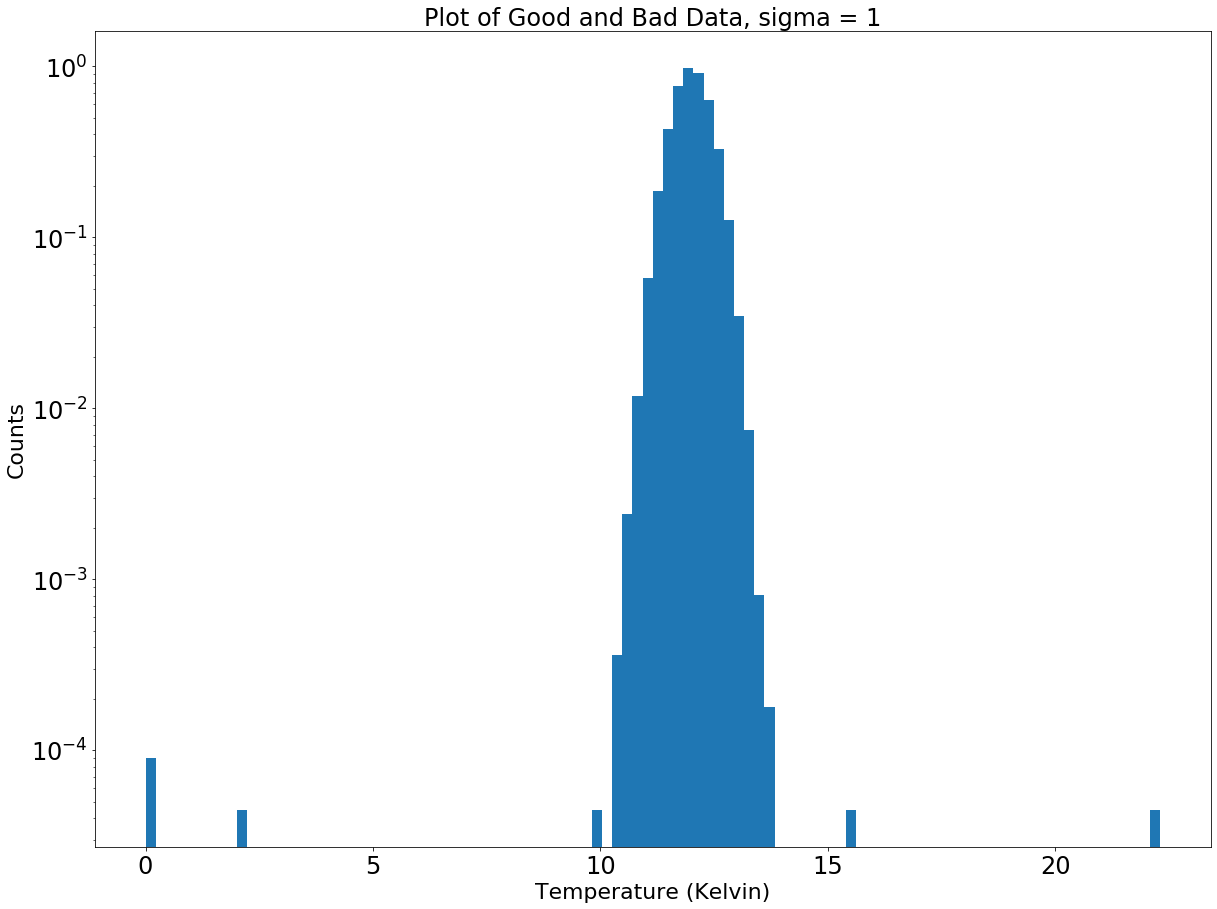

In [166]:
d = np.append(stats.norm.rvs(loc = 12., scale = .4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.title('Plot of Good and Bad Data, sigma = 1', size = 24)
plt.ylabel('Counts', size = 22)
plt.xlabel('Temperature (Kelvin)',size = 22)
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

Observing the plot above, we can spot the outliers at the ends, however, we cannot visually see the bad data point (12.7 K) that is closer to the center of distrubition which is at 12 K. That said, we would like to pick an alternative sigma value that will allow us to observe the distribution and whether or not the something signal-like or something more-signal like was produced. I have decided to choose sigma values of 3 and 5, respetively.  

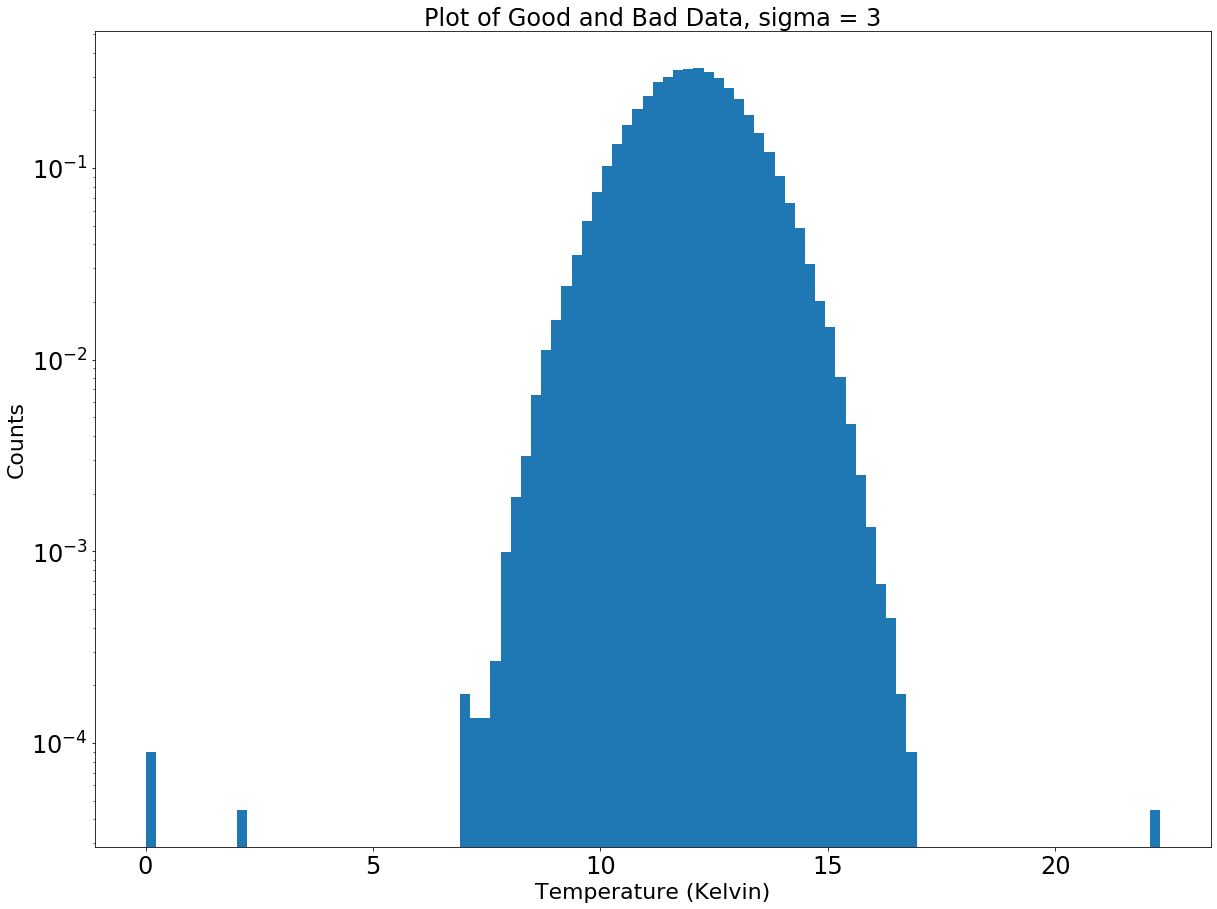

In [167]:
d2 = np.append(stats.norm.rvs(loc = 12., scale = 1.2, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d2,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.title('Plot of Good and Bad Data, sigma = 3', size = 24)
plt.ylabel('Counts', size = 22)
plt.xlabel('Temperature (Kelvin)',size = 22)
plt.show()

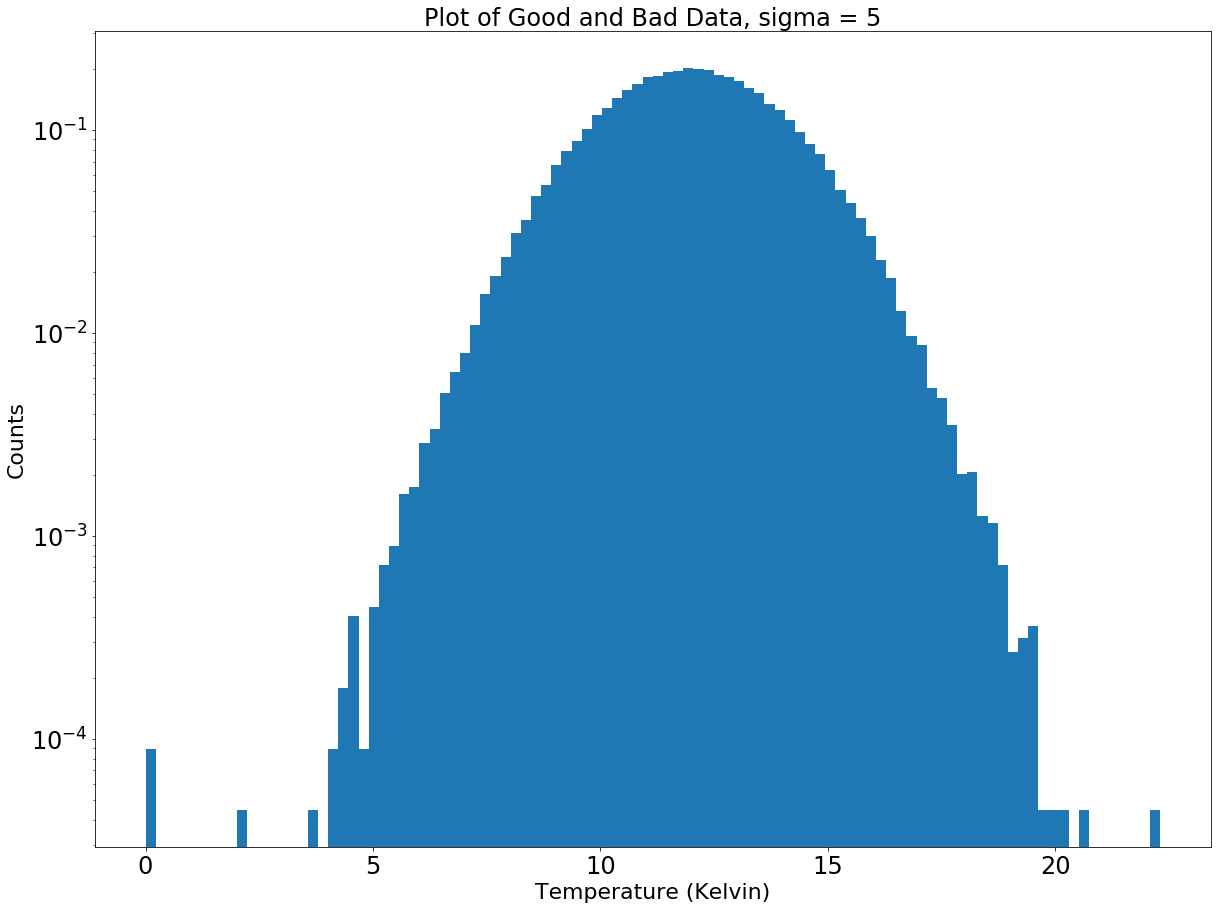

In [168]:
d2 = np.append(stats.norm.rvs(loc = 12., scale = 2.0, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d2,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.title('Plot of Good and Bad Data, sigma = 5', size = 24)
plt.ylabel('Counts', size = 22)
plt.xlabel('Temperature (Kelvin)',size = 22)
plt.show()

As we observe, we can see that as the sigma value increases the distribution widens. Fortunately, bad data is discarded, however, simulateously, the good data is also eliminated. That said, we would like to keep track of the known good data (True T and Kept), how often bad data was discarded properly (Bad T and Cut), as well as how often mistakes were made via either omission (good data thrown out) or commission (bad data included). With this we'd like to determine the dependence of the treshold on the data that is either kept or discarded.

In [169]:
sigma = 5
upper = 12 +(sigma*0.4)
low = 12- (sigma*0.4)
count_good = 0
for i in d:
    if (i >= low) & (i <= upper):
        count_good += 1
count_bad = len(d)-count_good

print(count_good)
print(count_bad)

100003
5


In [170]:
data = {'True T':  ['100,000', '0'], 
        'Bad T': ['3', '5'],}

df = pd.DataFrame (data, columns = ['True T','Bad T'], index=['Kept', 'Cut' ])

print (df)

       True T Bad T
Kept  100,000     3
Cut         0     5


As we know, there are 100,000 good data and 8 bad data points. Picking a sigma value of 5, good data that display a Gaussian distribution lies between 10 and 14, with the mean being 12 K. Anyting above or below 10 and 14 can be discarded. With the truth table above, depicts the association of a sigma value of 5. <br>
<br>
Choosing a smaller threshold value results in greater loss of good data compared to bad data. A high threshold value results in almost no loss of good data. The quantity is predicatble by observing the area under the curve and the rejected data. <br>
<br>
There are mistakes of commission where bad data is incorporated. From the truth table above, we can see that with a sigma value of 5, 38% of the data has not been rejected. This is inevitable, since the greater the treshold value the less good data is lost, however, lowering the treshold does the opposite. Trying to eliminate bad data also eliminates the good data. If we assume bad data lies farther away from the mean, a lower trehshold hold value produces an outcome with less commissions while a higher threshold value results in a greater comission. 

### Problem 2
In this problem, we are looking for asteroids. The image below shows stars that are not aligned perfectly due to atmospehric and instrumental effects. The distrubition is a 2-dimensional Gaussian with 1 arcsecond RMS. Asking the question, how far have all the stationary stars appear to have moved? We get the plot below.

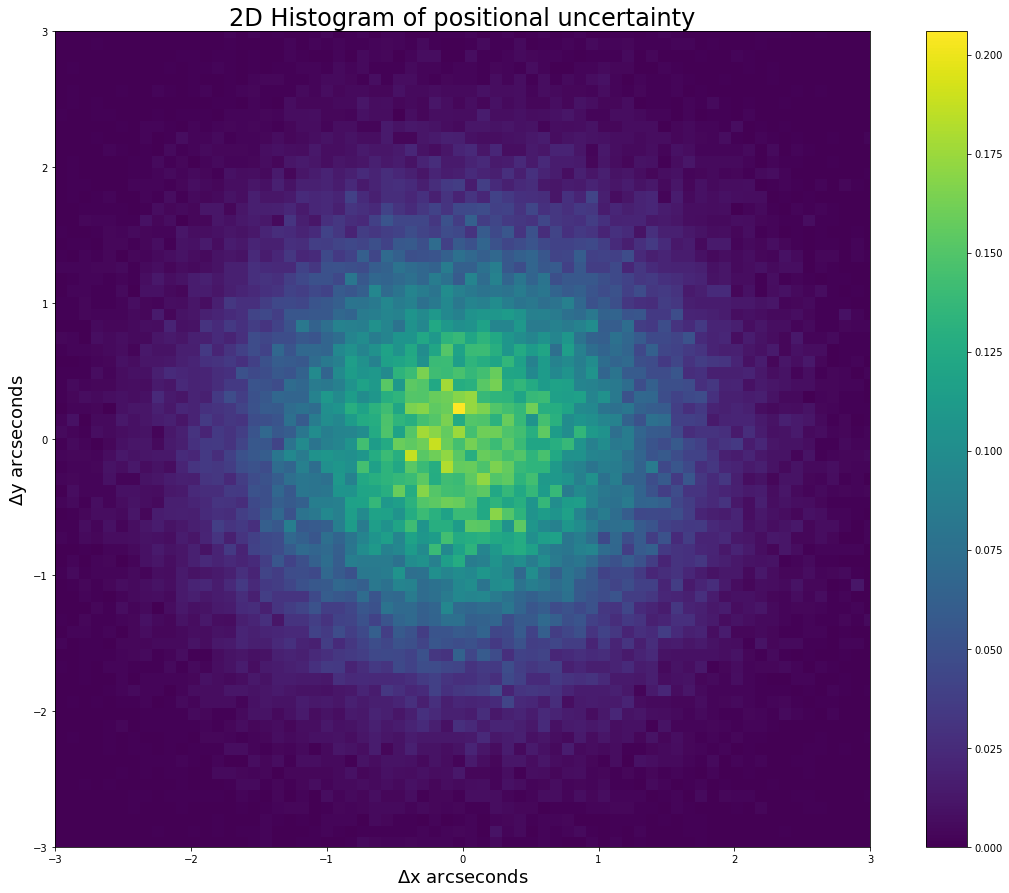

In [171]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

With a potential asteroid, there is some true movement between images. We want a 5 sigma detection movement. That said, we'd like to know what the distance is in arseconds. <br>
<br>
To determine the precense of an asteroid in an image, integrating a region of the distribution will produce a probability that an object will be detected via a displacement within the region that is integrated. <br>
<br>
The question we would like to ask is: what distance in arcseconds will provide us with a 2D Gaussian background that may produce a discplacement measurements (something asteroid-like or more asteriod-like) that has a sigma detection value of 5? <br>
<br>
Mathematicaly, we would like to integrate 
<br> <br>
$\int_{\pm \infty}^{\pm \rho}\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(\Delta x-\mu)^2}{2\sigma^2}}d\Delta x $ <br>
<br>
Because we have a 2-dimensional Gaussian distribution we will use a Rayleigh distribution as our pdf and from there determine the probability which will allow us to determine the distance from the origin. Here, the standard deviation is 1 arcsecond with a sigma of the value 5.

In [178]:
dist = stats.rayleigh(scale=1)
distance = dist.ppf(dist.cdf(5))

print("Distance with 5 sigma: " + str(round(distance)) + " arcseconds")



Distance with 5 sigma: 5.0 arcseconds


We get a distance of 5 arcseconds that represents a 5 sigma detection of motion

### Problem 3
For this problem we will assume that we see an average number of 1 cosmic ray per minute when observing a moon sized patch in the sky. For an 8-hour interval, we will count there to be 480 cosmic rays during this 8 hour period. Graphically, this is represented by a Poisson distribution with a mean of 480 cosmic rays. Observing over 15 days, we end up with a mean of 7200 cosmic rays. <br>
<br>
The question we would like to ask is: what is the significance of measuring 6800 cosmic rays over a 15 day interval? Alternatively, what is the probability that the background produced 6800 cosmic rays or less within the 15 day period when looking at the moon sized patch in the sky?<br>
<br>
Because we expect to see 7200 comsic rays, but observe 6800 we know that the moon blocked off some of the cosmic rays. Mathematically, we want to determine the sigma value. This is first done by integrating the pmf of the background from 0 to 6800 and then determing the sigma value this. 

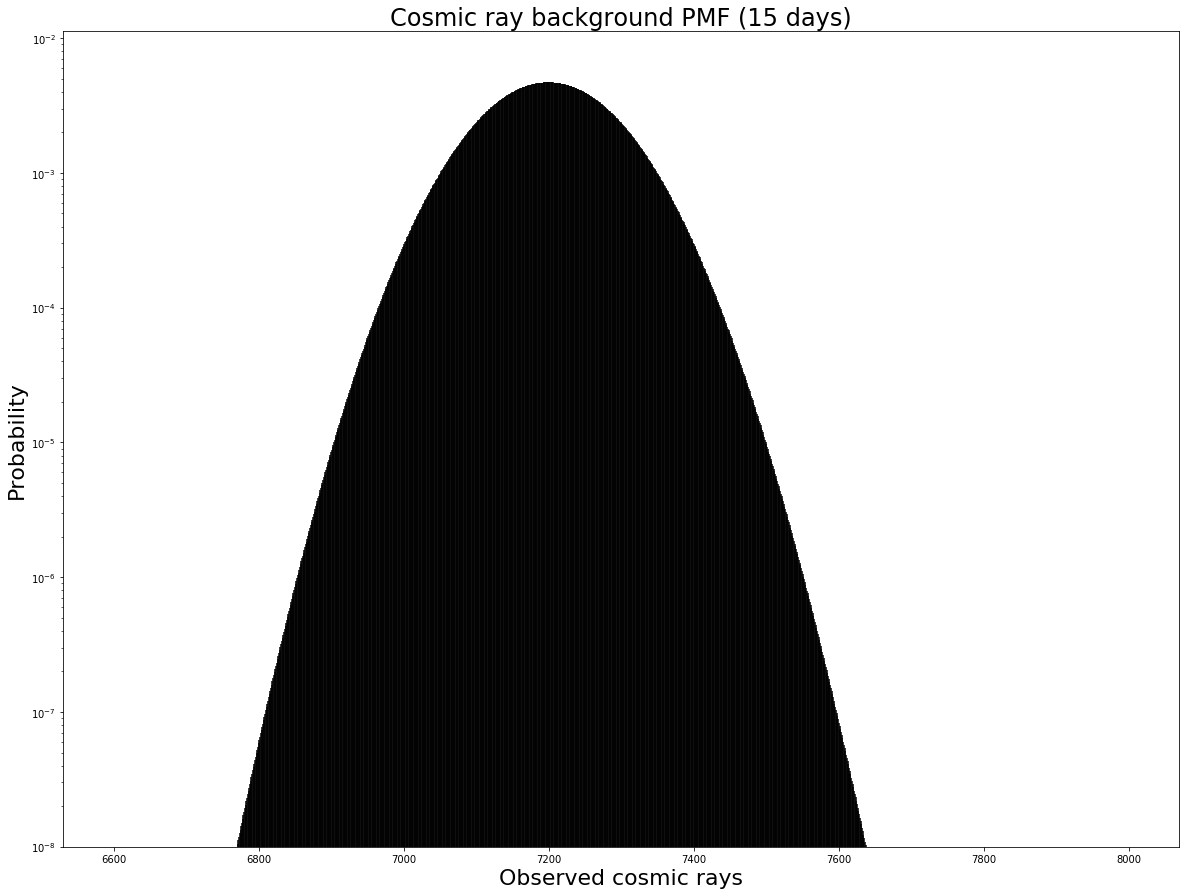

In [174]:
dist = stats.poisson(7200)
x = np.arange(6600, 8000)
pmf = dist.pmf(x)

plt.title("Cosmic ray background PMF (15 days)", size =24)
plt.xlabel("Observed cosmic rays", size = 22)
plt.ylabel("Probability", size =22)
plt.vlines(x, 0, pmf)
plt.yscale('log')
plt.ylim(1e-8, None);

Upon observation, even though the plot looks like a Gaussian distribution, we know that with a larger lamda(mean) value the poisson distrubition over time becomes a Gaussian. 

In [152]:
prob = dist.cdf(6800)
sig = stats.norm.ppf(1-prob)

print(sig)

4.750747965778662


From above, we determined that the significance value of the moon shadow to be 4.75 sigma. Because this sigma value is slightly smaller than 5 sigma it is not sufficient enough measurement. Therefore, a discovery cannot be claimed. 